In [534]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [264]:
cd D:\STUDY\SEM-4\ML\Assignment-1

D:\STUDY\SEM-4\ML\Assignment-1


In [265]:
data = pd.read_csv('student-mat.csv', sep = ';')

{'boxes': [<matplotlib.lines.Line2D at 0x266d1b7dcc0>],
 'caps': [<matplotlib.lines.Line2D at 0x266d1b51710>,
 'fliers': [<matplotlib.lines.Line2D at 0x266d01093c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x266d1b51f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x266d1b7de10>,
  <matplotlib.lines.Line2D at 0x266d1b512e8>]}

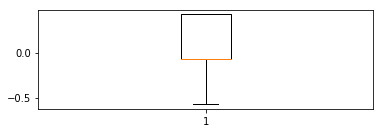

In [365]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)

plt.subplot(211)
plt.boxplot(data['famrel'])


famrel <- 2 and below
freetime<-2 and below
Dalc <- 4 and above
absences <- 25 and above
**failures <- 0 and above**
studytime <- 4 and above
traveltime <- 4 and above
Fedu <- 0 and below
age <- 22 and above 

In [266]:
data= data[~((data['famrel']<=2))]
data = data[~((data['freetime']<=2))]
data = data[~((data['Dalc']>=4))]
data = data[~((data['absences']>=25))]
data = data[~((data['studytime']>=4))]
data = data[~((data['traveltime']>=4))]
data = data[~((data['Fedu']==0))]
data = data[~((data['age']>=22))]

In [267]:
data.shape

(251, 33)

Normalization

In [268]:
c = ['age','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']

In [269]:
for i in c:
    data[i]= (data[i]-(data[i].mean()*np.ones(data.shape[0])))/(data[i].max()-data[i].min())

Model

In [271]:
 from sklearn.model_selection import train_test_split

In [465]:
xdata = pd.concat([data['failures'],data['absences'],pd.get_dummies(data['romantic'],drop_first=True),data['freetime'],data['goout'],data['age']],axis =1)
xdata_model = sm.add_constant(xdata)

In [466]:
X_train, X_test, y_train, y_test = train_test_split ( xdata_model, data['G3'], test_size=0.33, random_state=42)

In [463]:
q = smf.OLS(y_train,X_train).fit()
q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     11.77
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           6.40e-11
Time:                        14:32:46   Log-Likelihood:                -475.91
No. Observations:                 168   AIC:                             965.8
Df Residuals:                     161   BIC:                             987.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6465      0.386     27.591      0.000       9.884      11.408
failures      -7.6359      1.251     -6.103      0.000     -10.107      -5.165
absences       3.3121      1.441      2.298      0.023       0.466       6.158
yes           -1.7559      0.733     -2.395      0.018      -3.204      -0.308
freetime       3.2715      0.993      3.294      0.001       1.310       5.233
goout         -2.6794      1.219     -2.198      0.029      -5.086      -0.273
age           -2.3883      1.538     -1.553      0.122      -5.426       0.649
==============================================================================
Omnibus:                        6.241   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.104
Skew:                          -0.465   Prob(JB):                       0.0473
Kurtosis:                       3.080   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [506]:

def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    lst = [1,2]
    costly = [1,2]
    for k in range(len(alpha)):
        for i in range(0, numIterations):
            hypothesis = np.dot(x, theta)
            loss = hypothesis - y
            cost = np.sum(loss ** 2) / (2 * m)
            gradient = np.dot(xTrans, loss) / m
            # update
            theta = theta - alpha[k] * gradient   
        lst[k] = theta
        costly[k] = cost    
    return lst,costly        

In [507]:
x = X_train
y = y_train
m,n = np.shape(x)
numIterations= 100000
alpha = [0.001,0.01]
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

([array([10.64621089, -7.62738489,  3.28722723, -1.7566284 ,  3.27201606,
       -2.68078622, -2.37645627]), array([10.64646869, -7.63594428,  3.31207782, -1.75592717,  3.27145057,
       -2.67944722, -2.38825761])], [8.453379774567972, 8.453359261009663])


Changing Learning Rate and Gradient Descent

In [512]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    lst = [1,2,3]
    iteration = [1,2,3]
    for k in range(len(alpha)):
        prev_cost = 0
        for i in range(0, numIterations):
            hypothesis = np.dot(x, theta)
            loss = hypothesis - y
            cost = np.sum(loss ** 2) / (2 * m)
            if abs(cost-prev_cost) <= 0.000001:
                print("Iteration %d | Cost: %f" % (i, cost))
                break
            else:
                prev_cost = cost
            gradient = np.dot(xTrans, loss) / m
            # update
            theta = theta - alpha[k] * gradient   
        lst[k] = theta
        iteration[k] = i
    return lst,iteration

In [514]:
x = X_train
y = y_train
m,n = np.shape(x)
numIterations= 100000
alpha = [0.001,0.01,0.05]
theta = np.ones(n)
result = gradientDescent(x, y, theta, alpha, m, numIterations)
print(result)

Iteration 45611 | Cost: 8.461533
Iteration 1891 | Cost: 8.454242
([array([10.64352737, -7.28827555,  2.97384805, -1.7843249 ,  3.16359965,
       -2.64958012, -2.22008841]), array([10.64499051, -7.53933116,  3.17544565, -1.76335365,  3.25133632,
       -2.67965074, -2.32586007])], [45611, 1891])


Cross Validation - Linear Regression

In [515]:
sample = np.random.permutation(data.shape[0])

In [546]:
n = 5
holding_place = np.zeros((n,2))
for i in range(n):
    test = sample[int(data.shape[0]*i/n):int(data.shape[0]*(i+1)/n)]
    train_u = sample[:int(data.shape[0]*i/n)]
    train_l = sample[int(data.shape[0]*(i+1)/n):]
    train = np.concatenate([train_l,train_u])
    
    q = smf.OLS(data['G3'].iloc[train],xdata_model.iloc[train]).fit()
    
    yp_train= q.predict(xdata_model.iloc[train])
    MSE_train=mean_squared_error(data['G3'].iloc[train], yp_train)
    
    yp_test= q.predict(xdata_model.iloc[test])
    MSE_test=mean_squared_error(data['G3'].iloc[test], yp_test)
    
    holding_place[i,0] = MSE_train
    holding_place[i,1] = MSE_test
holding_place.mean(0)

array([16.09186677, 17.38335254])

Logistic Regression

In [544]:
data['G3'].median()

11.0

In [527]:
data['dep']= (data['G3']>=11).astype(int)
data['dep']

0      0
1      0
2      0
4      0
5      1
6      1
9      1
10     0
12     1
13     1
14     1
15     1
17     0
18     0
20     1
21     1
22     1
23     1
24     0
28     1
30     1
31     1
32     1
33     1
34     1
35     0
36     1
38     1
39     1
41     1
      ..
348    1
350    0
351    1
352    0
353    0
354    1
355    0
356    1
358    0
359    1
360    1
361    1
362    0
365    0
371    1
372    1
373    0
374    1
376    1
377    0
379    0
381    0
382    0
383    0
385    0
386    0
387    0
388    0
392    0
393    0
Name: dep, Length: 251, dtype: int32

In [547]:
lr = LogisticRegression()

In [548]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [552]:
a = smf.glm('dep~failures+absences+romantic+freetime+goout+age',family=sm.families.Binomial(),data = data).fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    dep   No. Observations:                  251
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -151.38
Date:                Mon, 17 Sep 2018   Deviance:                       302.75
Time:                        17:53:54   Pearson chi2:                     250.
No. Iterations:                     5                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0329      0.170      0.193      0.847      -0.301       0.367
romantic[T.yes]    -0.2412      0.309     -0.780      0.435      -0.847       0.365
failures           -3.6581      0.914     -4.004      0.000      -5.449      -1.868
absences           -0.1242      0.662     -0.188      0.851      -1.422       1.174
freetime            1.3695      0.451      3.036      0.002       0.485       2.254
goout              -1.6067      0.567     -2.834      0.005      -2.718      -0.496
age                -0.4169      0.734     -0.568      0.570      -1.856       1.022
===================================================================================
"""

In [551]:
g = lr.predict_proba(X_train)


array([[0.12947298, 0.01188166, 0.01457309, ..., 0.02376858, 0.02762848,
        0.0211699 ],
       [0.09835254, 0.01071159, 0.01331033, ..., 0.02774174, 0.02566631,
        0.02308263],
       [0.11195799, 0.01962179, 0.01845084, ..., 0.01352666, 0.02025387,
        0.018472  ],
       ...,
       [0.08070474, 0.01497674, 0.01996946, ..., 0.02112943, 0.04471299,
        0.03161606],
       [0.09132211, 0.01407107, 0.01530084, ..., 0.02212425, 0.0268637 ,
        0.02216149],
       [0.24803029, 0.02456806, 0.04060163, ..., 0.01051179, 0.01562609,
        0.014519  ]])